# Практическая работа №2

#### Папян Милена ММР212

## Продажи в магазинах США

### Краткое описание датасета

Этот набор данных содержит информацию о стоимости продаж в долларах США в американских магазинах в период с 2010 по 2011 год. Ниже приводится описание переменных.

### Определение переменных

1. Area Code - код магазина
2. State -  штат, в котором находится магазин
3. Market - регион, в котором находится магазин
4. Market Size - размер магазина
5. Profit - прибыль в американских долларах
6. Margin - выручка (Прибыли + Все расходы ИЛИ Продажи - Себестоимость)
7. Sales - продажи в денежном выражении
8. COGS - себестоимость товара
9. Total Expenses - все расходы, которые необходимы для конечной продажи продукта
10. Marketing - расходы на маркетинговое продвижение
11. Inventory - инвентарная стоимость продукта в момент продажи
12. Budget Profit - ожидаемая прибыль
13. Budget COGS - ожидаемая стоимость
14. Budget Margin - (Ожидаемая прибаль + Ожидаемые продажи)
15. Expected COGS - ожидаемая себестоимость
16. Budget Sales - ожидаемые продажи
17. ProductID - ID продукта
18. Date - дата продажи
19. Product Type - категория продукта
20. Product - описание продукта
21. Type - тип продукта

<br>

<br>

## Часть 1: EDA, работа с выбросами (Z-score), корреляционный анализ, визуализация и стандартизация

<br>

##### Импортируем библиотеки

In [71]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats

In [72]:
df = pd.read_csv("sales.csv")
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [75]:
df.shape

(4248, 20)

**_Проверим наличие пропусков в данных_**

In [76]:
df.isna()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
print(f'Количество пропусков в данных: {df.isnull().sum().sum()}')

Количество пропусков в данных: 0


_**Рассмотрим описательные статистики по категориальным переменным**_

In [78]:
df[['State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type']].describe()

,State,Market,Market Size,Product Type,Product,Type
count,4248,4248,4248,4248,4248,4248
unique,20,4,2,4,13,2
top,Utah,West,Small Market,Espresso,Columbian,Regular
freq,288,1344,2544,1176,480,2400


_Видно, что количество различных типов продукции довольно небольшое. Это упростит дальнейший анализ._

**_Корреляции между признаками_**

Text(0.5, 1, 'Correlation Heatmap Between Variable')

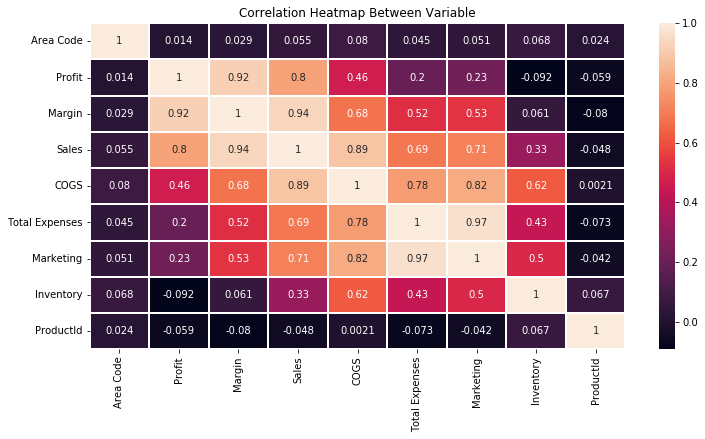

In [68]:
corr = df.corr()
plt.figure(figsize=(12,6))
heatmap=sns.heatmap(corr, linewidths=1, linecolor='White', annot=True)
heatmap.set_title('Correlation Heatmap Between Variable')

_Дальше мы рассмотрим корреляции признаков поближе_

_**Парные графики корреляции**_

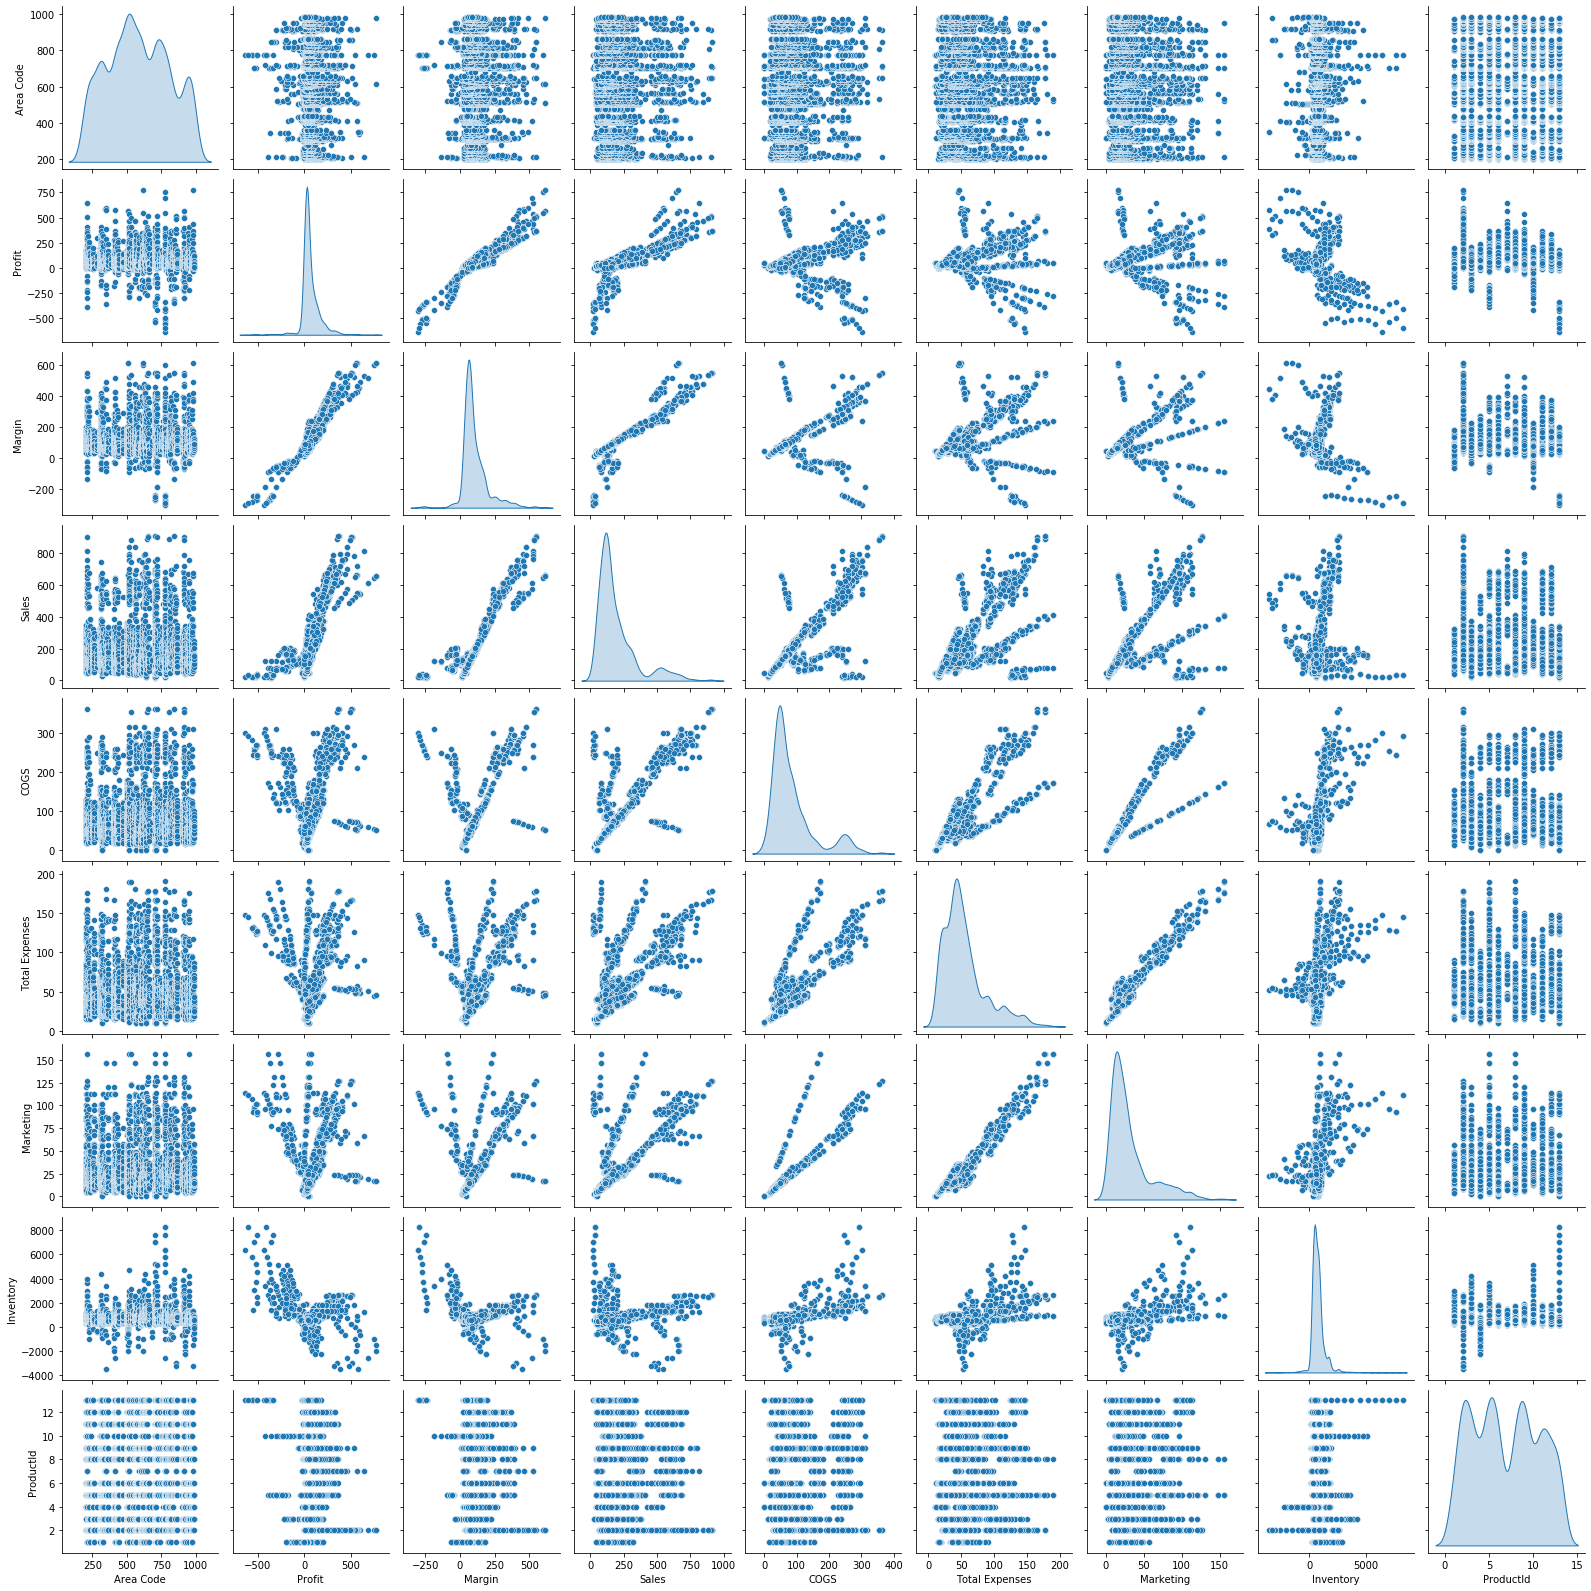

In [56]:
sns.pairplot(df, diag_kind='kde')

**_Посмотрим распределение магазинов по штатам_**

In [80]:
def state_setter(state):
    states_shortcuts = {'Connecticut':'CT', 'Washington':'WA','California':'CA','Texas':'TX', 'New York':'NY','Ohio':'OH','Illinois':'IL','Louisiana':'LA', 'Florida':'FL', 'Wisconsin':'WI','Colorado':'CO', 'Missouri':'MO', 'Iowa':'IA', 'Massachusetts':'MA', 'Oklahoma':'OK','Utah':'UT', 'Oregon':'OR', 'New Mexico':'NM', 'New Hampshire':'NH', 'Nevada':'NV'}
    return states_shortcuts[state]
    

In [81]:
df['State Code'] = df['State'].apply(state_setter)

In [82]:
fig1 = px.choropleth(locations=list(sorted(df['State Code'].unique())), locationmode="USA-states", color=df.groupby('State Code')["Area Code"].count(), scope="usa")
fig1.update_layout(title_text = 'States Markets', geo_scope='usa')
fig1.show()

 **_Посмотрим среднюю прибыль магазинов по штатам_**

In [237]:
fig2 = px.choropleth(locations=list(sorted(df['State Code'].unique())), locationmode="USA-states", color=df.groupby('State Code')["Profit"].mean(), scope="usa")
fig2.update_layout(title_text = 'States Average Profit', geo_scope='usa')
fig2.show()

_*в качестве среднего берем среднее арифметическое, так как прибыль распределена нормально_

_Иллинойс явно отличается по прибыли среди остальных штатов. От некоторых даже в 10+ раз! Но почему? <br>Давайте поближе рассмотрим именно этот штат. Введем метрик прибыль к издержкам:_

In [116]:
df.groupby('State').mean()['Profit'] / df.groupby('State').mean()['Total Expenses']

State
California       1.368745
Colorado         1.461171
Connecticut      0.941329
Florida          1.118176
Illinois         2.257453
Iowa             1.876330
Louisiana        1.024088
Massachusetts    2.430451
Missouri         0.373509
Nevada           0.571183
New Hampshire    0.415985
New Mexico       0.110313
New York         1.139423
Ohio             1.050922
Oklahoma         0.997785
Oregon           0.999277
Texas            1.970750
Utah             0.624627
Washington       0.887618
Wisconsin        0.756235
dtype: float64

_Иллинойс занимает лидирующую позицию прибыль/издержки. Это достаточно интересный кейс. А как дела с его издержками?:_

In [119]:
df.groupby('State').mean()['Total Expenses']

State
California       80.631944
Colorado         45.996212
Connecticut      48.190476
Florida          50.967593
Illinois         63.208333
Iowa             54.805556
Louisiana        42.750000
Massachusetts    46.979167
Missouri         44.634259
Nevada           70.401515
New Hampshire    39.321429
New Mexico       43.113095
New York         91.859375
Ohio             47.458333
Oklahoma         51.053571
Oregon           47.151515
Texas            47.619048
Utah             43.086806
Washington       53.537500
Wisconsin        53.273148
Name: Total Expenses, dtype: float64

_Средние издержки магазинов этого штата довольно высоки. Несмотря на это они не сильно отличаются от других (находятся к 1 std от среднего). По распределению издержек (выше, в sns pairplot) видно, что они скошены влево, посмотрим на распределение издержек в Иллинойсе и в штате с небольшой средней прибылью:_

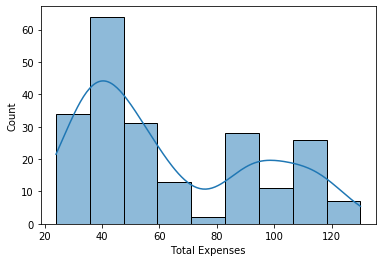

In [125]:
sns.histplot(df[df['State Code'] == 'IL']['Total Expenses'], kde=True)

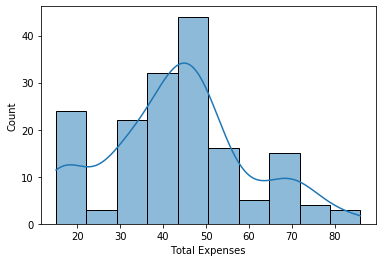

In [126]:
sns.histplot(df[df['State Code'] == 'NM']['Total Expenses'], kde=True)

_Кажется стало ясно. Но прежде, чем делать выводы давайте посмотрим как распределена прибыль к Илленойсе:_

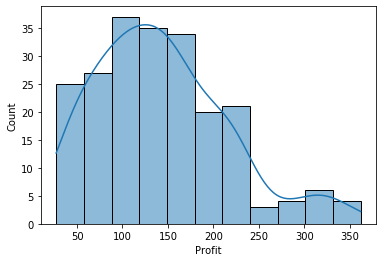

In [127]:
sns.histplot(df[df['State Code'] == 'IL']['Profit'], kde=True)

_Теперь понятно. Графики в целом всех издержек скошены влево. Однако есть и другие кейсы (график 2). Выходит коллапс: с одной стороны издержки в целом не распределены нормально, а скошены влево, но есть исключения. С другой и прибыль не везде распределена нормально (последний график). Пока тяжело точно сказать, что будет справедливой оценкой для всех и сразу. Давайте проведем стандартизацию, но для корректной работы прежде избавимся от выбросов, чтобы оценить разницу между штатами еще раз._

 **_Работа с выбросами_**

In [330]:
threshold = 4 #количество стандартных отклонений взятые в качестве пороговых
dataset = df.select_dtypes(include=["float64", "int64"]) #дубликат фрейма для очистки от выбросов
dataset = dataset[(abs(stats.zscore(dataset)) < threshold).all(axis=1)]
cols = dataset.columns
dataset

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
0,203,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2
1,203,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2
2,203,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2
3,203,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2
4,203,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4
4244,985,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4
4245,985,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4
4246,985,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4


In [331]:
print(f'Размер датасета до очистки: {df.shape}')
print(f'Размер датасета после очистки: {dataset.shape}')

Размер датасета до очистки: (4248, 21)
Размер датасета после очистки: (4122, 13)


 **_Стандартизация_**

In [332]:
from sklearn.preprocessing import StandardScaler
dataset_1 = dataset
object= StandardScaler()
scale = object.fit_transform(dataset_1)
dataset_1 = pd.DataFrame(scale)
dataset_1.columns = cols
dataset_1['State Code'] = np.array(df.loc[dataset.index]['State Code'])
dataset_1['State'] = np.array(df.loc[dataset.index]['State'])
dataset_1

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,State Code,State
0,-1.705159,0.606727,0.963760,0.775977,0.577871,0.567949,0.342421,0.566717,0.856047,0.667305,0.857050,0.805308,-1.353982,CT,Connecticut
1,-1.705159,0.196512,0.435349,0.287636,0.157260,0.266090,-0.021295,0.982859,0.525140,0.159434,0.452520,0.336090,-1.353982,CT,Connecticut
2,-1.705159,0.799016,1.208633,1.016503,0.804354,0.702108,0.504072,0.951536,1.186954,0.667305,1.126736,0.961713,-1.353982,CT,Connecticut
3,-1.705159,0.581089,0.937984,0.754111,0.561694,0.567949,0.302008,1.023131,0.856047,0.498014,0.857050,0.727105,-1.353982,CT,Connecticut
4,-1.705159,0.568269,0.435349,0.273058,0.157260,0.131930,-0.021295,0.982859,0.525140,0.159434,0.452520,0.336090,-1.353982,CT,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,1.833955,-0.841846,-0.453928,-0.528696,-0.538366,0.668568,0.504072,-2.469329,-0.963941,-0.517728,-0.626226,-0.602344,-0.804335,LA,Louisiana
4118,1.833955,-0.854665,-0.518368,-0.587005,-0.586898,0.534409,0.382833,-2.722146,-0.798487,-0.687018,-0.491383,-0.602344,-0.804335,LA,Louisiana
4119,1.833955,-0.803388,-0.325047,-0.397500,-0.408947,0.903347,0.786961,-3.941487,-0.963941,-0.517728,-0.491383,-0.524142,-0.804335,LA,Louisiana
4120,1.833955,-0.752111,-0.183278,-0.186128,-0.279528,1.138127,1.110264,-1.502806,-0.963941,-0.348438,-0.356540,-0.367736,-0.804335,LA,Louisiana


In [333]:
import warnings
warnings.filterwarnings("ignore")
fig2 = px.choropleth(locations=list(sorted(dataset_1['State Code'].unique())), locationmode="USA-states", color=dataset_1.groupby('State Code')["Profit"].mean(), scope="usa")
fig2.update_layout(title_text = 'States Average Profit', geo_scope='usa')
fig2.show()

_Посмотрим на количество убранных выбросов с threshold=4 (который я установила в работе с выбросами)._

In [335]:
pd.DataFrame(df.groupby('State').count()['Area Code'] - dataset_1.groupby('State').count()['Area Code']).rename(columns = {'Area Code':'Num of Outliers 1'})

,Num of Outliers 1
State,
California,34
Colorado,0
Connecticut,0
Florida,0
Illinois,8
Iowa,0
Louisiana,0
Massachusetts,21
Missouri,0


_Картина по прибыли поменялась не сильно. Иллинойс по-прежнему лидирует в нашей честной оценке распределений средней прибыли. Однако во время работы с выбросами я специально выбрала threshold = 4, чтобы продемонстрировать разницу и объяснить это явление. Давайте попробуем сделать то же самое, но с другим theshold'ом. Возьмем более честный = 3._

In [336]:
threshold = 3 #количество стандартных отклонений взятые в качестве пороговых
dataset = df.select_dtypes(include=["float64", "int64"]) #дубликат фрейма для очистки от выбросов
dataset = dataset[(abs(stats.zscore(dataset)) < threshold).all(axis=1)]
cols = dataset.columns

from sklearn.preprocessing import StandardScaler
dataset_1 = dataset
object= StandardScaler()
scale = object.fit_transform(dataset_1)
dataset_1 = pd.DataFrame(scale)
dataset_1.columns = cols
dataset_1['State Code'] = np.array(df.loc[dataset.index]['State Code'])
dataset_1['State'] = np.array(df.loc[dataset.index]['State'])
dataset_1

fig3 = px.choropleth(locations=list(sorted(dataset_1['State Code'].unique())), locationmode="USA-states", color=dataset_1.groupby('State Code')["Profit"].mean(), scope="usa")
fig3.update_layout(title_text = 'States Average Profit', geo_scope='usa')
fig3.show()

_Теперь у нас сразу 2 лидера. Посмотрим наглядно, сколько выбросов мы убрали, выбрав новый порог:_

In [337]:
pd.DataFrame(df.groupby('State').count()['Area Code'] - dataset_1.groupby('State').count()['Area Code']).rename(columns = {'Area Code':'Num of Outliers 2'})


,Num of Outliers 2
State,
California,60
Colorado,0
Connecticut,0
Florida,2
Illinois,38
Iowa,8
Louisiana,0
Massachusetts,24
Missouri,0


_Выходит, что Илленойс не самый "фонящий" по выбросам штат. Однако это может быть связано с количеством, поэтому дальше перейдем к оговоренной выше относительной величине:<br> средняя прибыль/средние издержки по штатам:_

In [339]:
fig3 = px.choropleth(locations=list(sorted(dataset_1['State Code'].unique())), locationmode="USA-states", 
                     color=dataset_1.groupby('State Code')["Profit"].mean() / dataset_1.groupby('State Code')["Total Expenses"].mean(), scope="usa")
fig3.update_layout(title_text = 'States Average Profit / Average Expenses', geo_scope='usa')
fig3.show()

_Так будет распределена наша метрика. Тут Иллинойс уже не является лидером, а Айова показывает красивый высокомаржинальный бизнес._

**_Корреляции между признаками_**

Text(0.5, 1, 'Correlation Heatmap')

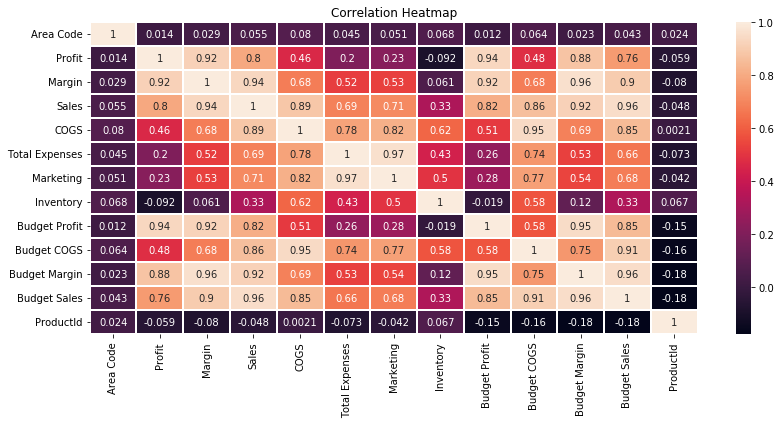

In [343]:
corr = df.corr()
plt.figure(figsize=(12,6))
heatmap=sns.heatmap(corr, linewidths=1, linecolor='White', annot=True)
heatmap.set_title('Correlation Heatmap')

**_Первичные выводы по тепловой карте корреляций_** <br>

1) _С учетом того, что COGS + Profit = Margin высокая корреляция между тремя этими признаками очевидна._ <br>
2) _Маркетинг очень сильно связан с издержками. Наблюдается почти полная корреляция, что свидетельствует о том, что маркетинг - одна из основных частей расходов._ <br>
3) _Маркетинг также довольно слабо коррелирует с прибылью. По данным тяжело сказать, стоит ли оптимизировать маркетинговые издержки. Технически маркетинг напрямую уменьшает чистую прибыль (так как несет в себе траты), однако он и повышает ее, возможно в более далекой перспективе._ <br>
4) _Инвентарь сильно коррелирует с COGS - себестоимостью. Что вполне логично._ <br>
5) _Маркетинг также связан сильно с COGS._

**_Самые взаимосвязанные признаки_**

In [348]:
temp_corr = df.drop(columns = ['Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales'], axis = 1) 

In [349]:
pd.DataFrame(temp_corr.corr().unstack().sort_values(ascending=False).drop_duplicates()).iloc[1:6]

,,0
Total Expenses,Marketing,0.966167
Sales,Margin,0.938809
Margin,Profit,0.920604
Sales,COGS,0.886651
COGS,Marketing,0.818271


_Упомянутые выше выводы подтверждаются_

<br>

<br>

## Часть 2: Вопросы и визуализация

<br>

**_Как наблюдения распределены по месяцам?_**

In [373]:
df['Date'] = pd.to_datetime(df['Date'])

In [376]:
def month_name(date):
    month = date.month
    vocab = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
          'october', 'november', 'december']
    return vocab[month - 1]

In [377]:
df['Date'] = df['Date'].apply(month_name)

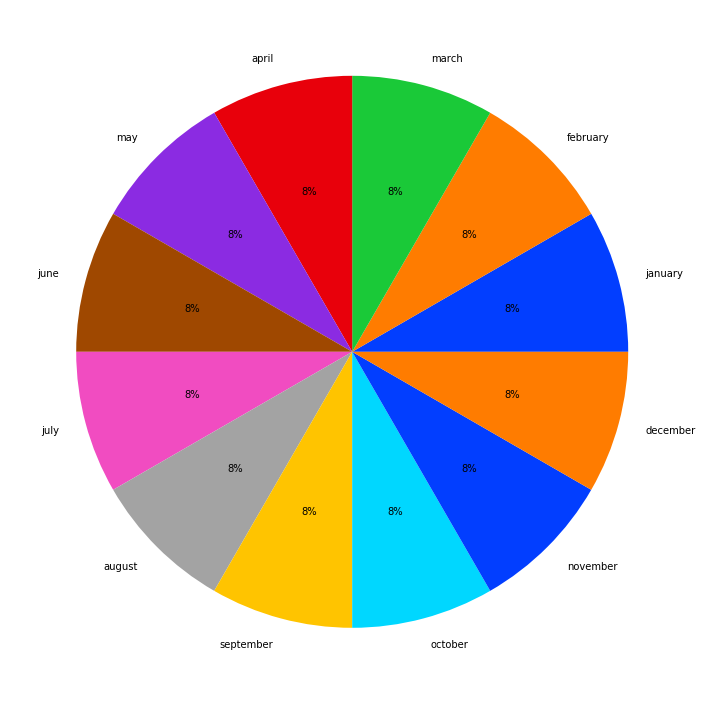

In [387]:
colors = sns.color_palette('bright')
names = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
values = []
for i in names:
    values.append(len(df[df['Date'] == i]))
    
plt.pie(values, labels = names, colors = colors, autopct='%.f%%')
plt.show()

_В каждом месяце зафиксировано одинаковое количество наблюдений - 354_

<br>

**_Какой месяц принес всем магазинам больше всего прибыли?_**

In [411]:
temp_profit = pd.DataFrame(np.array(df.groupby('Date').sum()['Profit'])).rename(columns={0:'Profit'})
temp_profit['Month'] = np.array(names)
temp_profit

,Profit,Month
0,21533.0,january
1,22771.0,february
2,21900.0,march
3,20788.0,april
4,20565.0,may
5,23576.0,june
6,22789.0,july
7,20780.0,august
8,21295.0,september
9,20859.0,october


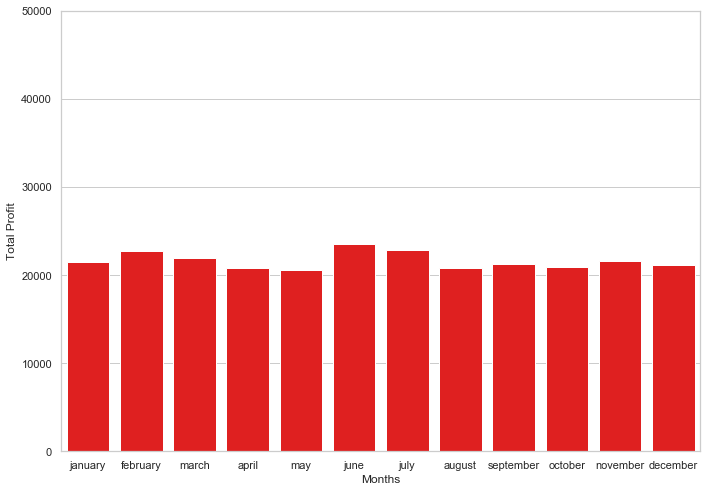

In [427]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 7))
ax.set(ylim=(0, 50000))
sns.barplot(y=temp_profit['Profit'], x=temp_profit['Month'], data=temp_profit, label="Total Profit", color="red")
sns.set_color_codes("pastel")
ax.set(ylabel="Total Profit",xlabel="Months")

plt.show()

_Самыми прибыльными стали для магазинов летние месяца: июнь и июль_

**_Какой тип напитков по содержанию кофеина покупается чаще всего?_**

([<matplotlib.patches.Wedge at 0x260119ab388>,
 [Text(-0.22297041052297795, 1.077164888042316, 'With Coffeine'),
  Text(0.22297041052297828, -1.077164888042316, 'With No Coffeine')],
 [Text(-0.12162022392162432, 0.5875444843867177, '56%'),
  Text(0.1216202239216245, -0.5875444843867177, '44%')])

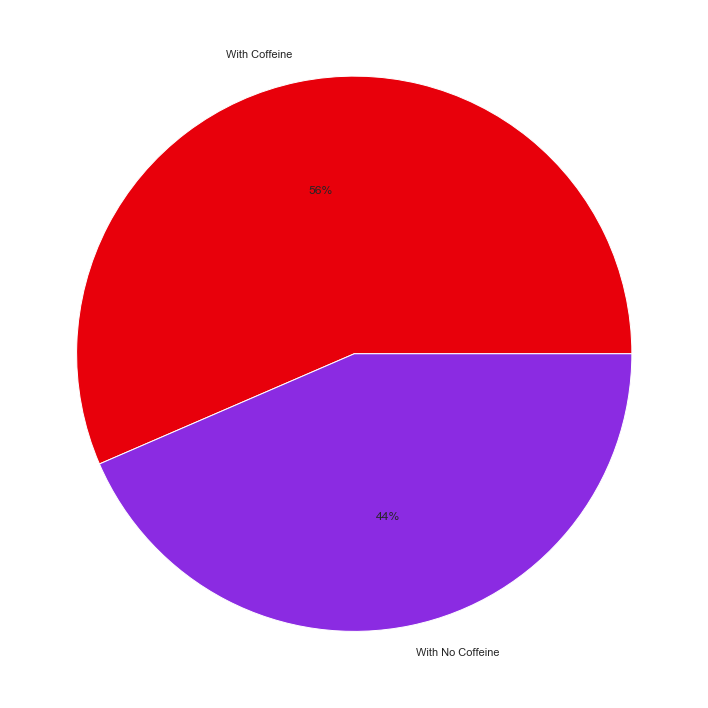

In [451]:
colors = sns.color_palette('bright')[3:7]
values = [len(df[df['Type'] == 'Regular']), len(df[df['Type'] == 'Decaf'])]
names = ['With Coffeine', 'With No Coffeine']
plt.pie(values, labels = names, colors = colors, autopct='%.f%%')

_Практически половина проданных напитков не содержит кофеин_

**_Прибыльность каждого типа напитков?_**

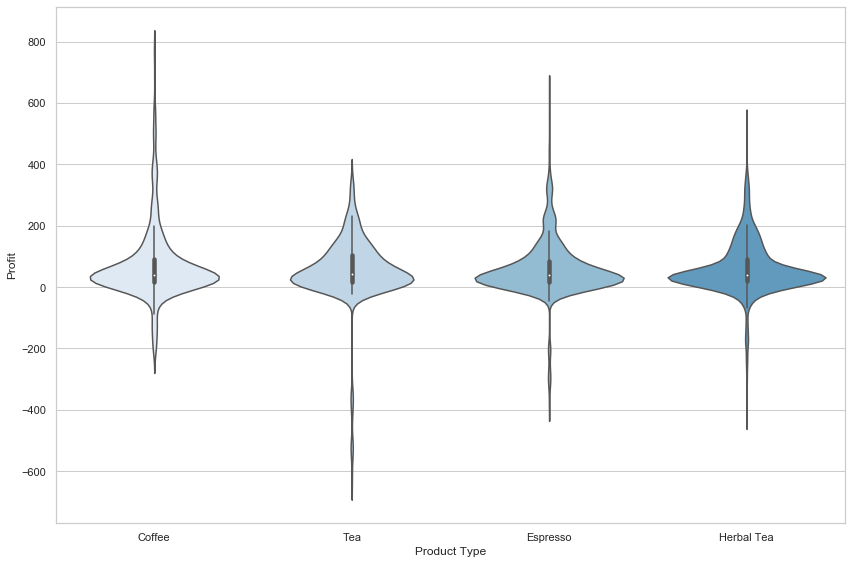

In [458]:
sns.set_palette('Blues')
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='Product Type',y='Profit')

_В целом прибыльность примерно одинакова, однако, если сравнивать чай и кофе,<br> то видны выбросы в неприбыльную и прибыльную стороны. Возможно кофе больше ценится любителями горячих напитков._

<br>

## Часть 3: Постановка и проверка гипотез

<br>

_Статистическая гипотеза хи-квадрат Пирсона - это проверка **независимости** категориальных переменных.<br/>
В данном разделе будут созданы новые **категориальные** переменные (так как в оригинальных данных они отсутствуют) и проверена гипотеза._

_**Гипотеза:** в штатах с более высоким уровнем жизни продается больше кофе, чем в штатах с меньшим._<br> На основании статистики 2014-го года (предположим, что с 2010-го жизнь не сильно поменялась).<br>
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%88%D1%82%D0%B0%D1%82%D0%BE%D0%B2_%D0%A1%D0%A8%D0%90_%D0%BF%D0%BE_%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%D1%83_%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D1%82%D0%B8%D1%8F_

In [462]:
standard_of_living = pd.DataFrame({'State': ['Connecticut', 'Washington', 'California', 'Texas', 'New York',
       'Ohio', 'Illinois', 'Louisiana', 'Florida', 'Wisconsin',
       'Colorado', 'Missouri', 'Iowa', 'Massachusetts', 'Oklahoma',
       'Utah', 'Oregon', 'New Mexico', 'New Hampshire', 'Nevada'], 'Life Rate': [0.974, 0.954, 0.970, 0.927, 0.969, 0.921, 0.953, 0.901, 0.934, 0.942, 0.938, 0.909, 0.917, 0.964, 0.900, 0.926, 0.959, 0.943, 0.962, 0.910]})

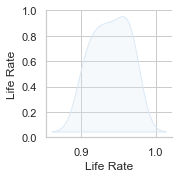

In [468]:
sns.pairplot(standard_of_living, diag_kind='kde')

_Кажется, что распределение нормальное, однако это следует проверить._

_Чтобы выбрать метод поиска среднего для дальнейшего распределения штатов по группам, основываясь на уровне жизни, проведем **тест Шапиро-Уилка**:_

- Принять H0: Данные выборки получены из нормального распределения.
- Отклонить H0: Данные выборки получены из ненормального распределения.

In [480]:
from scipy.stats import shapiro 
from scipy. stats import lognorm

data = standard_of_living['Life Rate']
shapiro(data)

(0.9441232085227966, 0.2865379750728607)

_Поскольку p-значение больше 0.05, мы принимаем нулевую гипотезу теста Шапиро-Уилка, и в качестве среднего будем использовать **среднее арифметическое**._

<br>

_Чтобы выбрать метод поиска среднего для дальнейшего распределения штатов по группам, основываясь на уровне продаж кофе, проведем **тест Шапиро-Уилка**:_

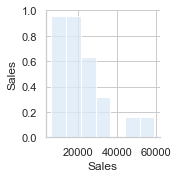

In [507]:
sns.pairplot(pd.DataFrame(df[(df['Product Type'] == 'Coffee') | (df['Product Type'] == 'Espresso')].groupby('State').sum()['Sales']))

_Распределение скошено влево, но стоит проверить это формально._

In [504]:
from scipy.stats import shapiro 
from scipy. stats import lognorm

data = pd.DataFrame(df[(df['Product Type'] == 'Coffee') | (df['Product Type'] == 'Espresso')].groupby('State').sum()['Sales'])['Sales']
shapiro(data)

(0.869731605052948, 0.011622154153883457)

_Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу теста Шапиро-Уилка, и в качестве среднего будем использовать **медиану**._

<br>

_Присвоим штатам категории по уровню жизни:_

In [481]:
def get_life_level(x):
    if x < standard_of_living['Life Rate'].mean():
        return "Not high level"
    else:
        return "High level"

standard_of_living['Level Category'] = standard_of_living['Life Rate'].apply(get_life_level)

<br>

_Присвоим штатам категории по уровню потребления кофе:_

In [519]:
def get_coffee_level(x):
    coffee_sales = dict(df[(df['Product Type'] == 'Coffee') | (df['Product Type'] == 'Espresso')].groupby('State').sum()['Sales'])
    if float(coffee_sales[x]) < float(df[(df['Product Type'] == 'Coffee') | (df['Product Type'] == 'Espresso')].groupby('State').sum()['Sales'].median()):
        return "Low coffee"
    else:
        return "High coffee"

standard_of_living['Level Coffee'] = standard_of_living['State'].apply(get_coffee_level)

In [520]:
standard_of_living

,State,Life Rate,Level Category,Level Coffee
0,Connecticut,0.974,High level,Low coffee
1,Washington,0.954,High level,High coffee
2,California,0.970,High level,High coffee
3,Texas,0.927,Not high level,High coffee
4,New York,0.969,High level,High coffee
5,Ohio,0.921,Not high level,Low coffee
6,Illinois,0.953,High level,High coffee
7,Louisiana,0.901,Not high level,Low coffee
8,Florida,0.934,Not high level,High coffee
9,Wisconsin,0.942,High level,High coffee


In [521]:
standard_of_living.drop(["State", "Life Rate"], axis=1, inplace=True)
standard_of_living.head()

,Level Category,Level Coffee
0,High level,Low coffee
1,High level,High coffee
2,High level,High coffee
3,Not high level,High coffee
4,High level,High coffee


_Составим таблицу сопряженности по данному датафрейму:_

In [522]:
ct_o = standard_of_living.groupby('Level Category')['Level Coffee'].value_counts().unstack()
ct_o

Level Coffee,High coffee,Low coffee
Level Category,,
High level,7,3
Not high level,3,7


_Посчитаем степени свободы:_

_Обычно выбирается коэффициент значимости 0,05. Это альфа-значение означает вероятность ошибочного отклонения H0, когда оно истинно. Более низкие значения альфы выбираются в тех случаях, когда мы ожидаем большей точности. Остановимся на 0.05._

$
dof = (R - 1)(C - 1)
$

In [529]:
alpha = 0.05
dof = (2 - 1) * (2 - 1)

_Критическое значение в данном случае будет равно:_

In [530]:
critical_value = 3.84146

_Общее количество наблюдений:_

In [531]:
n_total = ct_o.sum().sum()
n_total

20

_Количество наблюдений каждого вида (кофе):_

In [532]:
n_high_coffee = ct_o.iloc[:, 0].sum()
n_low_coffee = ct_o.iloc[:, 1].sum()

_Вероятности попадания в каждую из групп (преступления):_

In [534]:
p_high_coffee = n_high_coffee / n_total
p_low_coffee = n_low_coffee / n_total

_Количество наблюдений каждого вида (уровень жизни):_

In [538]:
n_high_level = ct_o.iloc[0].sum()
n_low_level = ct_o.iloc[1].sum()

_Произведем вычисления:_

In [539]:
f_e_high_coffee_high_level = n_high_level * p_high_coffee
f_e_low_coffee_high_level = n_high_level * p_low_coffee

In [540]:
f_e_high_coffee_low_level = n_low_level * p_high_coffee
f_e_low_coffee_low_level = n_low_level * p_low_coffee

In [541]:
ct_e = np.array([[f_e_high_coffee_high_level, f_e_low_coffee_high_level],
                [f_e_high_coffee_low_level, f_e_low_coffee_low_level]])
ct_e

array([[5., 5.],
       [5., 5.]])

_Рассчитаем критерий Хи:_

$
\chi^2 = \sum{\frac{(f_o - f_e)^2}{f_e}}
$

In [542]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()

In [543]:
print(chi_square, critical_value)
print(chi_square > critical_value)

3.2 3.84146
False


In [544]:
stat, p, dof, expected = chi2_contingency(ct_o, correction=False)
print("P значение: " + str(p))
if p <= alpha:
    print('Вывод: Опровергаем гипотезу H0. Зависимость значима')
else:
    print('Вывод: H0 подтвердилась. Зависимость не значима')

P значение: 0.07363827012030258
Вывод: H0 подтвердилась. Зависимость не значима


<br/>

_**Вывод:** Выбранная методика отражает общую закономерность. Нулевая гипотеза не отвергается._
<br/>
- _**H0** - между уровнем жизни и продажами кофе отсутствует связь._
<br/>
- _**H1** - между уровнем жизни и продажами кофе существует связь._
<br/>

<br/>

**_U-тест Манна-Уитни: непараметрическое сравнение двух выборок_**

- Принять H0: Распределения выборок одинаковы.
- Отклонить H0: Распределения выборки не одинаковы.

**_Одинаковы ли распределения по чистой прибыли между двумя штатами с самым высоким уровнем жизни (Connecticut & California)?_**

In [479]:
from scipy.stats import mannwhitneyu

# берем необходимые выборки
Connecticut = df[df['State'] == 'Connecticut']['Profit']
California = df[df['State'] == 'California']['Profit']

#зададим необходимые переменные
statistics, p_val = mannwhitneyu(Connecticut, California)

# альфу возьмем равным 0.05
a_val = 0.05

if p_val > a_val:
    print(f'Stats = {statistics}       p-value = {p_val}')
    print('Распределения одинаковы. Принимаем нулевую гипотезу.')
else:
    print(f'Stats = {statistics}       p-value = {p_val}')
    print('Распределения разные. Отвергаем нулевую гипотезу.')

Stats = 13514.5       p-value = 1.8333098141293427e-15
Распределения разные. Отвергаем нулевую гипотезу.


_Значение p показывает, что выборки (распределения) отличаются. Отвергаем нулевую гипотезу._